# Plotting Streamlines with `yt`
Example of how to plot streamlines with `yt` taken from [here](http://yt-project.org/doc/visualizing/streamlines.html)

In [1]:
import yt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from yt.visualization.api import Streamlines
from yt.units import Mpc
from mpl_toolkits.mplot3d import Axes3D

Load the sample dataset.

In [3]:
ds = yt.load('/Users/willbarnes/.yt/sample_data/IsolatedGalaxy/galaxy0030/galaxy0030')

yt : [INFO     ] 2016-05-19 00:54:36,569 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2016-05-19 00:54:36,570 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2016-05-19 00:54:36,571 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2016-05-19 00:54:36,573 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2016-05-19 00:54:36,575 Parameters: cosmological_simulation   = 0.0


Now, define the center of the box, $c$, the number of streamlines, $N$, the spatial scale of the streamlines relative to the boxsize, and then the random position of the streamlines. 

In [4]:
c = ds.domain_center
N = 100
scale = ds.domain_width[0]
pos_dx = np.random.random((N,3))*scale-scale/2.
pos = c+pos_dx

In [5]:
pos

YTArray([[  4.14456300e-01,   1.41361796e-01,   5.45082359e-01],
       [  7.25569462e-01,   4.05368347e-01,   5.25675149e-01],
       [  2.29525998e-01,   4.00851686e-01,   2.74207537e-02],
       [  5.45557187e-01,   1.86797004e-01,   7.10829734e-01],
       [  4.86973092e-01,   3.00492322e-01,   2.97688979e-02],
       [  3.60963416e-01,   2.72579166e-01,   5.51447231e-01],
       [  4.95492531e-01,   9.65665769e-01,   1.90330919e-01],
       [  9.61932000e-01,   8.49142914e-03,   8.09938951e-02],
       [  4.48795331e-01,   7.38263792e-01,   9.07551021e-01],
       [  7.14396754e-01,   6.63377393e-01,   7.28998078e-01],
       [  3.00457598e-01,   8.66233902e-01,   5.12089015e-01],
       [  6.56699163e-02,   1.35053137e-02,   6.53317636e-01],
       [  9.33170464e-01,   2.50544346e-01,   3.56400585e-01],
       [  5.99889944e-01,   4.93519415e-01,   8.59128133e-01],
       [  2.75013611e-01,   2.60642402e-01,   1.54662449e-01],
       [  5.83204033e-01,   6.15964857e-01,   9.34363

Now create 3D streamlines of the 3D vector velocity and integrate them through the box defined above.

In [47]:
streamlines = Streamlines(ds, pos, 'Bx', 'By', 'Bz',
                          length=1.0*Mpc, get_magnitude=True)
streamlines.integrate_through_volume()

yt : [INFO     ] 2016-05-18 17:19:42,960 AMRKDTree rebuilt, Final Volume: 1.000000e+00


Next, plot the streamlines with `matplotlib`

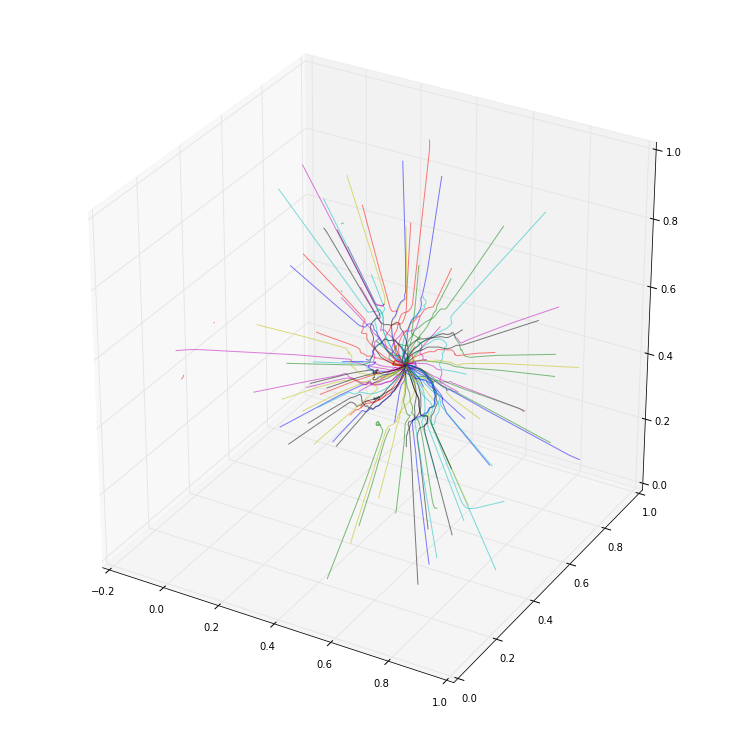

In [20]:
fig=plt.figure(figsize=(10,10))
ax = Axes3D(fig)
for stream in streamlines.streamlines:
    stream = stream[np.all(stream != 0.0, axis=1)]
    ax.plot3D(stream[:,0], stream[:,1], stream[:,2], alpha=0.5)

In [45]:
test_stream = streamlines.streamlines[50]

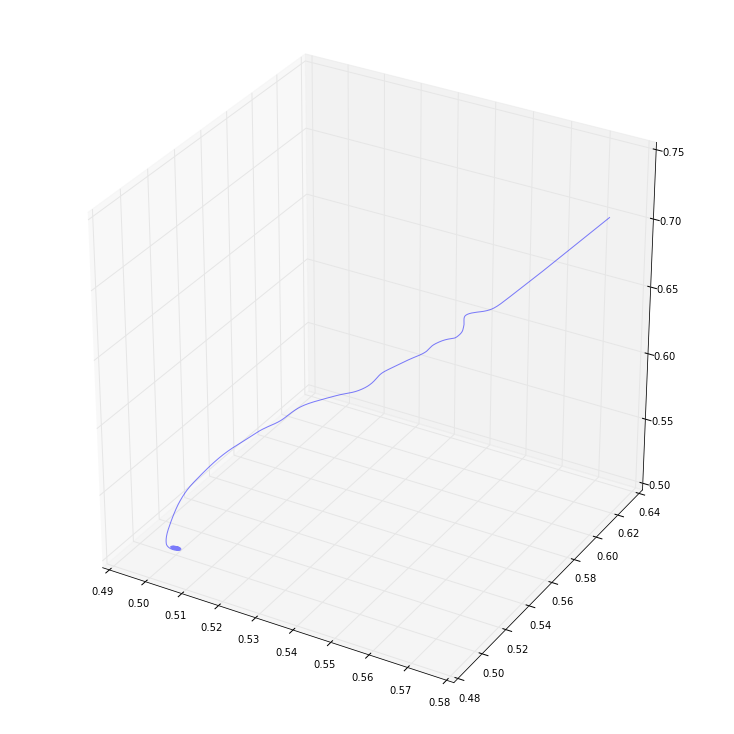

In [46]:
fig=plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.plot3D(test_stream[:,0], test_stream[:,1], test_stream[:,2], alpha=0.5)

## Data Access along the Streamline

In [33]:
stream = streamlines.path(0)

In [38]:
stream.chunks

AttributeError: 'YTStreamlineBase' object has no attribute 'p'